# Engineering Programming - Project: part 1
<quote> @valigatotuS </quote><br>2nd Bachelor Industrial Engineering
___

### Table of Contents
* 1.0 [Introduction](#1.2-Introduction)
* 1.3 [Crop feature](#1.3-Crop-feature)
* 1.4 [Mirror feature](#1.4-Mirror-feature) 
* 1.5 [Negative and Gamma modification](#1.5-Negative-and-Gamma-modification) 
* 1.6 [Colours](#1.6-Colours)
* 1.7 [Filters](#1.7-Filters)
* 1.8 [Type of values in an image](#1.8-Type-of-values-in-an-image)
* 1.9 [Grayscale](#1.9-Grayscale)
* 1.10 [Segmentation](#1.10-Segmentation) 

## 1 Image processing with Numpy

### 1.0 Introduction

This assignement was given for gaining experience with the "Numpy" python-library and image-processing. 

In [3]:
import numpy as np
import matplotlib.pylab as plt

We will go through all of the steps of different kinds of image-processing and so discover the Numpy-features.

#### 1.0.1 Useful functions and information

Loading images with matplotlib as an array with `plt.imread(...)`:


In [4]:
#reading pictures and returning [M: #rows; N: #columns; 3 (0.-1.)] for RGB images 
lenna_png = plt.imread("./../filespics/lenna.png") 
mushrooms_png = plt.imread("./../files/pics/mushrooms.png")
peppers_png = plt.imread("./../files/pics/peppers.png")

Looking at some images properties and element(s) with `pic.shape`:

In [5]:
print(f"The array-shape of the picture is:  {lenna_png.shape}")
print(f"R-G-B intensity of first pixel of the picture: {(lenna_png[0][0])}\n")

The array-shape of the picture is:  (512, 512, 3)
R-G-B intensity of first pixel of the picture: [0.8862745  0.5372549  0.49019608]



Following function will show the picture(s) on a row using `plt.imshow(...)`:

In [6]:
def ShowPics(pics: list, cmap = "gray") -> None:
    """
    Showing the given pic(s) on a row.
    """
    f = plt.figure()                                     # making new figure
    for i in range(len(pics)):                           
        f.add_subplot(1, len(pics), i + 1)               # adding each pic as subplot of the figure
        plt.axis(False)                                  # hiding the axis of the pic
        plt.imshow(pics[i], cmap = plt.get_cmap(cmap))   # "cmap" to map scalar data to colors, will be ignored for RGB data

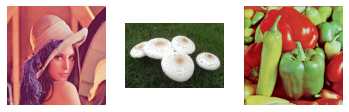

In [7]:
ShowPics([lenna_png, mushrooms_png, peppers_png])        #showing all pics

### 1.3 Crop feature

>Function, that takes as parameters the image to crop and the percentage of the image that is to be kept (or cut), and return the new image. (1)

For this feature will need to slice the pic-array at a certain percentage.

In [8]:
def CropPicture(pic: np.ndarray, p: int) -> np.ndarray:
    """
    Returns a cropped picture at p%. (0<p<100)
    """
    if p in range(0, 100):       # checking validity of input <p>
        b = pic.shape[0]         # numbers of pixels on base-length of the pic
        h = pic.shape[1]         # numbers of pixels on height-length of the pic
        cb = b * (1 - p / 100)   # calculating number of pixels on cropped base-length
        ch = h * (1 - p / 100)   # calculating number of pixels on cropped height-length
        cpic = np.copy(pic[int(b / 2 - cb / 2): int(b / 2 + cb / 2), int(h / 2 - ch / 2) :int(h / 2 + ch / 2),:])
        
        return cpic
    
    else: raise ValueError('p must be (0<p<100).') # raising error if p is not valid

>Using the previous function plotting next to each other the base image ”lenna.png”, and the image cropped of 10%.(2)

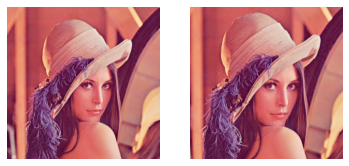

In [9]:
cropped_lenna_png = CropPicture(lenna_png, 10) # return 10% cropped lenna_png
ShowPics([lenna_png, cropped_lenna_png])       # showing lenna without and with cropping

>Another cropping function, but that takes as parameters the image and 4 percentages: how much to keep (or cut) of each side of the image.(3)

This function will be like previous one but we will need to retain only two of the percentages (base / height).

In [10]:
def CropPictureSides(pic: np.ndarray, p_s1: int, p_s2: int, p_s3: int, p_s4: int) -> np.ndarray:
    """
    Returns a cropped picture at p% of each side. (0<p<100)   
           s1_
          s4|_|s2
           s3
    """
    p_h = max([p_s1, p_s3])        # min. percentage of base
    p_b = max([p_s2, p_s4])        # min. percentage of height
    
    if (p_h&p_b) in range(0, 100): # checking validity of input
        b = pic.shape[0]           # numbers of pixels on base-length of the pic
        h = pic.shape[1]           # numbers of pixels on height-length of the pic         
        cb = b * (1 - p_b / 100)   # calculating number of pixels on cropped base-length
        ch = h * (1 - p_h / 100)   # calculating number of pixels on cropped height-length
        cpic = np.copy(pic[int(b / 2 - cb / 2): int(b / 2 + cb / 2), int(h / 2 - ch / 2) :int(h / 2 + ch / 2),:])
        
        return cpic
    
    else:
        raise ValueError('p must be (0<p<100).')

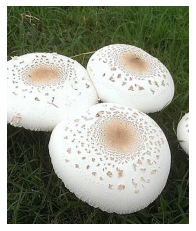

In [11]:
cropped_mushroom_png = CropPictureSides(mushrooms_png, 50, 10, 0, 0) # base cropped at 50% and height at 10%
ShowPics([cropped_mushroom_png])

### 1.4 Mirror feature

>Function that flips an image given in parameter. The user should be able to choose if the image is mirrored vertically (meaning from left to right, or right to left), or horizontally. (1)

For this feature certain arrays from the picture have to be inverted using this slicing-feature: `[::-1]` 

In [12]:
def MirrorPicture(pic: np.ndarray, sense: bool) -> np.ndarray:
    """
    Returns a vertically(sense: False)/horizontally(sense: True) mirrored picture.
    """
    if sense: #Horizontal mirroring
        return np.copy(pic[::-1, :, :]) # inverting the rows of the picture
    else:     #Vertical mirroring
        return np.copy(pic[:, ::-1, :]) # inverting the columns of the picture

>Using the previous function, plotting next to each other the base image ”lenna.png” and the vertically mirrored image.(2)

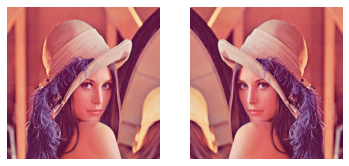

In [13]:
verticallyMirrored_lenna = MirrorPicture(lenna_png, False) # vertically mirrored lenna_png
ShowPics([lenna_png, verticallyMirrored_lenna]) 

### 1.5 Negative and Gamma modification

>Function that takes an image as a parameter, and returns the negative of this image.(1)

In this case we will only need to make this operation: `1 - a_pic`

In [14]:
def NegativePicture(pic: np.ndarray) -> np.ndarray:
    """
    Returns a negative(light-inversion) picture.
    """
    return 1 - np.copy(pic) # inverting each pixel

>Function that takes as parameters an image and a percentage, and returns the image with a modified gamma (a percentage >1 will increase the gamma).(2)

We will apply the gamma modification with the exponantial: `pixel**gamma`

In [15]:
def GammaPicture(pic: np.ndarray, p: float) -> np.ndarray:
    """
    Returns a picture with modified gamma at a p%.
    """
    return np.copy(pic)**(1 / p)  # gamma (a percentage p >1 will increase the gamma)

>Using the previous functions, plotting next to each other the the base image ”lenna.png”, its negative, and a dark and light version of the base image.(3)

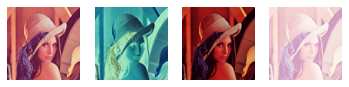

In [16]:
negative_lenna = NegativePicture(lenna_png)
dark_lenna, light_lenna = (GammaPicture(lenna_png,0.4), GammaPicture(lenna_png,5))

ShowPics([lenna_png, negative_lenna, dark_lenna, light_lenna])

### 1.6 Colours

>Function that separates the 3 Red, Green and Blue channels of a given image and returns those 3 channels.(1)

For this feature we will need to slice other channels out separately by equalling them to 0 : `channel0_only[:, :, (1, 2)] = 0`

In [17]:
def SplitColoursPicture(pic: np.ndarray) -> list:
    """
    Returns a list with 3 pictures containing each only one colour (R,G,B).
    """
    R, G, B = (np.copy(pic), np.copy(pic), np.copy(pic))
    R[:, :, (1, 2)] = 0    #setting Blue- & Greenvalue to 0
    G[:, :, (0, 2)] = 0    #setting Red- & Greenvalue to 0
    B[:, :, (0, 1)] = 0    #setting Blue- & Greenvalue to 0
    
    return [R, G, B]

>Using the previous function, plotting next to each other the 3 separated channels of the base image ”lenna.png”.(2)

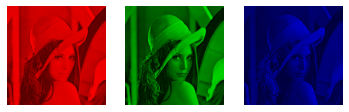

In [18]:
RGB_lenna = SplitColoursPicture(lenna_png)
ShowPics(RGB_lenna) #Red Lenna / Green Lenna / Blue Lenna

>Function that merges the 3 channels into one array, plotting the result.(3)

Merging by summing them: `sum()`

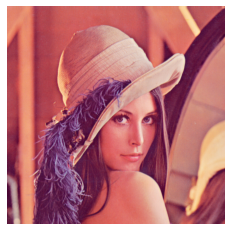

In [19]:
def ZipPictures(pictures: list) -> np.ndarray:
    """
    Returns a picture out by zipping given pictures. (must be same array-shape)
    """
    return sum(pictures)

RGB2_lenna = ZipPictures(RGB_lenna)
ShowPics([RGB2_lenna])

### 1.7 Filters

>Plotting next to each other the base image ”lenna.png”, and one version with each a color channel missing (one without red, one without blue, etc.). (1)

Using previous function: `ZipPictures()`

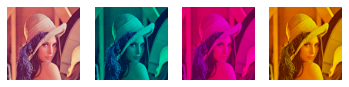

In [20]:
Rm, Gm, Bm = ((ZipPictures(RGB_lenna[1:3])), (ZipPictures(RGB_lenna[0::2])), (ZipPictures(RGB_lenna[0:2]))) #Red missing, ...
ShowPics([lenna_png, Rm, Gm, Bm])

<font color = gray>
You can see how removing one channel of the picture completely changes the rendering of it.<br>
RGB - R = cyan-tone<br>
RGB - G = purple-tone<br>
RGB - B = yellow-tone
</font>

>Creating simple sepia-filter.(2)

Following function is from: https://stackoverflow.com/questions/23802725/using-numpy-to-apply-a-sepia-effect-to-a-3d-array

In [345]:
def SepiaFilter0(pic: np.ndarray) -> np.ndarray:
    """
    Returns a picture with sepia-filter.
    """
    sepia_filter = np.array([[.393, .769, .189],
                             [.349, .686, .168],
                             [.272, .534, .131]])
    sepia_pic = np.copy(pic).dot(sepia_filter.T) # transposing the filter and making the dot product
    sepia_pic[sepia_pic > 1] = 1                 # holding values at maximum 1
    
    return sepia_pic

looking at documentation of the dot product with `help(np.dot)`:<br>
- ...
- If 'a' is an N-D array and 'b' is an M-D array (where 'M>=2'), <br>
      it is a sum product over the last axis of `a` and the second-to-last axis of `b`:
        dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
- ...

In [346]:
%timeit sepia_lenna = SepiaFilter0(lenna_png) #calculating best execution-time

34.5 ms ± 127 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<font color = gray>
Time is due to the dot product - operation.
</font>

Trying to improve the execution time of it using only one `for`-loop and slicing-features:

In [21]:
def SepiaFilter(pic: np.ndarray) -> np.ndarray:
    """
    Returns a picture with sepia-filter.
    """
    sepia_pic = np.copy(pic)  
    r, g, b = (sepia_pic[: ,: ,0], sepia_pic[: ,: ,1], sepia_pic[: ,: ,2])    # taking each channel
    newR, newG, newB = (np.zeros_like(r), np.zeros_like(r), np.zeros_like(r)) # creating the new channels of same shape (0-filled) 

    for i in range(len(sepia_pic)): # applying sepia-formula to r,g,b of the picture
        newR[i] = 0.393 * r[i] + 0.769 * g[i] + 0.189 * b[i] # sepia-R
        newG[i] = 0.349 * r[i] + 0.686 * g[i] + 0.168 * b[i] # sepia-G
        newB[i] = 0.272 * r[i] + 0.534 * g[i] + 0.131 * b[i] # sepia-B
        
    sepia_pic[: ,: ,0], sepia_pic[: ,: ,1], sepia_pic[: ,: ,2] = (newR, newG, newB)
    sepia_pic[sepia_pic > 1] = 1   # holding values at maximum 1
    
    return sepia_pic

In [22]:
%timeit sepia_lenna = SepiaFilter(lenna_png)

20.9 ms ± 167 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<font color = gray>
My function is 1.8x faster.
</font>

>Using the previous functions, plotting next to each other the base image ”lenna.png” and the sepia version.(3)

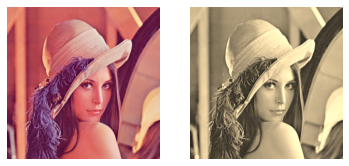

In [23]:
sepia_lenna = SepiaFilter(lenna_png)
ShowPics([lenna_png, sepia_lenna])

### 1.8 Type of values in an image

>Method that converts a given image to unsigned integers on 8 bits from 0 to 255.(1)

For the conversion we will need to cast the entire pandas-object using: `.astype()`

In [24]:
def uint8_Picture(pic: np.ndarray) -> np.ndarray:
    """
    Returns a 8-bits picture.
    """
    uint8_pic = (pic * 255).astype(np.uint8) #converting floatarray to unsigned 8-bit integersarray. (0>1)>>>(0>255)
    
    return uint8_pic

>Check and print the type of the image values before and after the conversion.(2)

In this case we will check the datatype with: `np.dtype`

In [25]:
uint8_mushroom = uint8_Picture(mushrooms_png)
print("The datatype of the picture of mushroom:")
print(f" before the conversion: {mushrooms_png.dtype}\n after the conversion: {uint8_mushroom.dtype}")

The datatype of the picture of mushroom:
 before the conversion: float32
 after the conversion: uint8


>Using the previous function, plotting next to each other the base image ”peppers.png” and the uint8 version.(3)

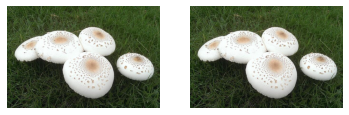

In [26]:
ShowPics([mushrooms_png, uint8_mushroom])

<font color = gray>
There are no notable differences between the integersarray-picture and the floatarray-picture.
</font>

>Showing next to each other in a subplots the separated RGB channels of each images.(4)

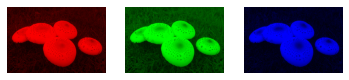

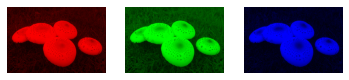

In [27]:
RGB_mushroom = SplitColoursPicture(mushrooms_png)
RGB2_mushroom = SplitColoursPicture(uint8_mushroom)
ShowPics(RGB_mushroom)
ShowPics(RGB2_mushroom)

Looking at what happens to a random pixel during conversion:

In [29]:
#picking random pixel (green channel)
pix_r = mushrooms_png[200, 300, 1]
pix_a, pix_b, pix_c = (pix_r, (pix_r * 255), int(pix_r * 255))
print(pix_a, pix_b, pix_c) 

0.96862745 247.00000047683716 247


<font color = gray>
I see no notable differences between the integersarray-RGB-pictures and the floatarray-RGB-pictures. But going from 8 digits to 3 will mean in a litlle loss of quality.
</font>

### 1.9 Grayscale

>Lightness method, that averages the most prominent and least prominent colors for each pixel.(1)

We will take those colors with: `max()`&`min()`

In [30]:
def Grayscale1Picture(picture: np.ndarray) -> np.ndarray:
    """
    Returns a grayscaled-picture. (Lightness method)
    """
    pic = np.copy(picture)                               
    r, g, b = (pic[: ,: ,0], pic[: ,: ,1], pic[: ,: ,2]) # taking channels
    g_pic = np.zeros_like(r)  # grayscaled-picture will be a 2D-array of gray-nuance's (0-filled)
    rows, cols = (g_pic.shape[0], g_pic.shape[1])
    
    for i in range(rows): #going trough the elements of grascaled-picture
        for j in range(cols):
            g_pic[i, j] = (max([r[i, j] ,g[i, j], b[i, j]]) + min([r[i, j] ,g[i, j], b[i, j]])) / 2 
            #assigning average of min and max color to the element
    
    return g_pic

>Average method that simply averages the values for each pixel.(2)

In [31]:
def Grayscale2Picture(picture: np.ndarray) -> np.ndarray:
    """
    Returns a grayscaled-picture. (Average method)
    """
    pic = np.copy(picture) 
    r, g, b = (pic[: ,: ,0], pic[: ,: ,1], pic[: ,: ,2]) # taking channels
    g_pic = np.zeros_like(r)  # grayscaled-picture will be a 2D-array of gray-nuance's (0-filled)
    rows, cols = (g_pic.shape[0], g_pic.shape[1])
    
    for i in range(rows): #going trough the elements of grascaled-picture
        for j in range(cols):
            g_pic[i, j] = sum([r[i, j], g[i, j], b[i, j]]) / 3
    
    return g_pic

>Luminosity method, that is a more sophisticated version of the average method. It also averages the values, but it forms a weighted.(3)

Following function will grayscale pictures by making the dot product of each vector of the array with the RGB-weights.

In [32]:
def Grayscale3Picture(picture: np.ndarray) -> np.ndarray:
    """
    Returns a grayscaled-picture. 
    """
    rgbWeights = [0.21, 0.72, 0.07]
    grayscaled_picture = np.dot(np.copy(picture), rgbWeights) / 3 #average with dot product of vector with rgb-weights. 
    
    return grayscaled_picture

Using those 3 functions for grayscaling peppers:

In [33]:
grayscaled_peppers = [Grayscale1Picture(peppers_png), #Lightness method
                      Grayscale2Picture(peppers_png), #Average method
                      Grayscale3Picture(peppers_png)] #Luminosity method

For showing grayscaled pictures we will use previous function `Showpics()` which will be able to show gray-pictures if we configure `cmap = "gray"` this mean reading ndarrays of shape [512,512] and not [512,512,3] anymore.

Peppers grayscaled with: lightness-, average- and luminositymethod.


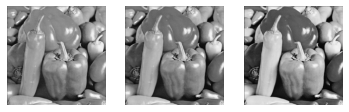

In [34]:
ShowPics(grayscaled_peppers, cmap = "gray")
print("Peppers grayscaled with: lightness-, average- and luminositymethod.")

<font color = gray>
The Luminosity-method looks a more convenient grayscaling-method for easily differing the vegetables-colours from each other. I would definetely choose for this one.
</font>

### 1.10 Segmentation

>Function that takes has parameters an image and a threshold value, and returns a segmented image.(1)

In this case we will use the slicing feature with a condition: `a_pic[condition]`

In [35]:
def SegmentPicture(picture: np.ndarray, th: float) -> np.ndarray:
    """
    Returns a segmented-picture. (black/white) 
    """
    s_pic = Grayscale3Picture(np.copy(picture))
    s_pic[s_pic > th], s_pic[s_pic < th] = (1, 0) #replacing values that are greater/lower than threshold
    
    return s_pic

>Using the previous function, plotting next to each other a few versions of the segmented image ”peppers.png”, with different threshold values.(2)

In [36]:
segmented_peppers = [SegmentPicture(peppers_png, .10),
                     SegmentPicture(peppers_png, .15),
                     SegmentPicture(peppers_png, .20),
                     SegmentPicture(peppers_png, .25),
                     SegmentPicture(peppers_png, .30)]

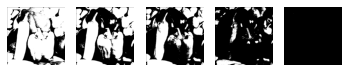

In [37]:
ShowPics(segmented_peppers, cmap = "gray")

>A good image to see the interest of image segmentation, using only a simple greyscale threshold, is the ”mushrooms.png” image.(3)

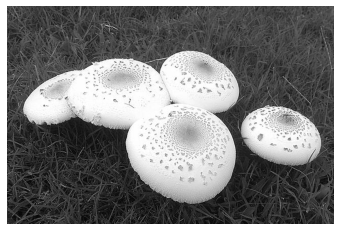

In [38]:
grayscaled_mushroom = Grayscale3Picture(mushrooms_png)
ShowPics([grayscaled_mushroom], cmap = "gray")

By manually trying different values for the threshold we can easily hide the background of the mushroom.

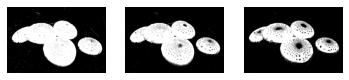

In [39]:
segmented_mushrooms = [SegmentPicture(mushrooms_png, .18),
                       SegmentPicture(mushrooms_png, .22),
                       SegmentPicture(mushrooms_png, .26),] #at this threshold we totally hide the background

ShowPics(segmented_mushrooms, cmap = "gray")

<font color = "brown">
Conclusion:<br><br>
Image processing-techniques let you manipulate any picture at wish and can help finding extra-information and so can be very useful in numereous fields.
</font>

References:
* https://numpy.org/doc/stable/user/basics.html
* https://note.nkmk.me/en/python-numpy-image-processing/
* https://www.pythoninformer.com/python-libraries/numpy/numpy-and-images/
* https://data-flair.training/blogs/image-processing-with-scipy-and-numpy/